## Importing libraries

In [ ]:
#Importing Libraries

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, log_loss
from torchsummary import summary
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
import torch.optim as optim
import pandas as pd
import torch
from scipy import stats
from torch.utils.data import DataLoader, TensorDataset
import time
import h5py
import numpy as np
import os
import torch.nn.functional as F
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from torch._C import NoneType
import torch.nn as nn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Loading the data

In [ ]:
df=pd.read_csv("dataset1.csv");

display(df)
print(df.shape)

,Facility Name,DOH Region,Facility County,Facility Network,Patients Currently Hospitalized,Patients Admitted Due to COVID,Patients Admitted Not Due to COVID,Patients Newly Admitted,Patients Positive After Admission,Patients Discharged,Patients Currently in ICU,Patients Expired,Total Staffed Beds,Total Staffed Beds Currently Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Available,Total New Admissions Reported,Young,Adult,Senior
0,HIGHLAND HOSPITAL,WESTERN REGIONAL OFFICE,MONROE,UNIVERSITY OF ROCHESTER MEDICAL CENTER,15.0,9.0,6.0,4.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,4,0,0.0,0
1,NEWARK-WAYNE COMMUNITY HOSPITAL,WESTERN REGIONAL OFFICE,WAYNE,ROCHESTER REGIONAL HEALTH SYSTEM,3.0,0.0,3.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
2,sjrh - ST JOHNS division,METROPOLITAN AREA REGIONAL OFFICE,WESTCHESTER,"RIVERSIDE HEALTH CARE SYSTEM, INC.",7.0,6.0,1.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
3,MONTEFIORE MEDICAL CENTER - HENRY AND LUCY MOS...,METROPOLITAN AREA REGIONAL OFFICE,BRONX,MONTEFIORE HEALTHCARE SYSTEM,44.0,5.0,39.0,6.0,2,11.0,2.0,0.0,0.0,0.0,0.0,0,8,0,0.0,0
4,NEWYORK-PRESBYTERIAN BROOKLYN METHODIST HOSPITAL,METROPOLITAN AREA REGIONAL OFFICE,KINGS,NEW YORK-PRESBYTERIAN HEALTHCARE SYSTEM,23.0,13.0,10.0,3.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239941,DEGRAFF MEMORIAL HOSPITAL,WESTERN REGIONAL OFFICE,NIAGARA,KALEIDA HEALTH,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
239942,ST. MARY'S HEALTHCARE,CAPITAL DISTRICT REGIONAL OFFICE,MONTGOMERY,ASCENSION HEALTH,4.0,0.0,0.0,0.0,0,0.0,2.0,0.0,120.0,73.0,8.0,4,0,0,2.0,2
239943,ROCHESTER GENERAL HOSPITAL,WESTERN REGIONAL OFFICE,MONROE,ROCHESTER REGIONAL HEALTH SYSTEM,14.0,0.0,0.0,0.0,2,2.0,8.0,0.0,524.0,143.0,40.0,4,0,0,8.0,6
239944,BON SECOURS COMMUNITY HOSPITAL,METROPOLITAN AREA REGIONAL OFFICE,ORANGE,WESTCHESTER MEDICAL CENTER HEALTH NETWORK,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,94.0,47.0,8.0,4,0,0,0.0,0


(239946, 20)


## Key Statistics

In [ ]:
df_numerical=['Patients Currently Hospitalized','Patients Admitted Due to COVID','Patients Admitted Not Due to COVID','Patients Newly Admitted','Patients Positive After Admission','Patients Discharged','Patients Currently in ICU','Patients Expired','Total Staffed Beds','Total Staffed Beds Currently Available','Total Staffed ICU Beds','Total Staffed ICU Beds Currently Available','Total New Admissions Reported','Young','Adult','Senior']
cat_cols = ['Facility Name', 'DOH Region','Facility County','Facility Network']

print("Number of entries: ", len(df) )
print("Number of features:", df.shape[1])
display(df.describe())
#Mean
mean=df[df_numerical].mean()
display(mean)

#Median
median=df[df_numerical].median()
display(median)

#Mode
mode=df[cat_cols].mode()
display(mode)

#min and max
min_values=df[df_numerical].min()
max_values=df[df_numerical].max()
display(min_values)
display(max_values)

#quartiles

display(df[df_numerical].quantile(0.25))
display(df[df_numerical].quantile(0.50))
display(df[df_numerical].quantile(0.75))

#counts
print(df.nunique())

#standard deviation
deviation=df[df_numerical].std()
display(deviation)


Number of entries:  239946
Number of features: 20


,Patients Currently Hospitalized,Patients Admitted Due to COVID,Patients Admitted Not Due to COVID,Patients Newly Admitted,Patients Positive After Admission,Patients Discharged,Patients Currently in ICU,Patients Expired,Total Staffed Beds,Total Staffed Beds Currently Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Available,Total New Admissions Reported,Young,Adult,Senior
count,239945.000000,239944.000000,239942.000000,239945.000000,239946.000000,239944.000000,239943.000000,239940.000000,239941.000000,239941.000000,239944.000000,239946.000000,239946.000000,239946.000000,239945.000000,239946.000000
mean,15.165513,2.607917,2.889027,1.580983,0.669905,1.925395,2.859425,0.233813,80.703669,22.485694,10.911734,3.693985,1.912014,0.252699,5.831132,8.427321
std,32.625375,8.188163,8.664763,3.512352,2.929132,4.316023,8.671365,0.953142,176.762898,48.789782,29.029672,10.791928,3.583851,1.199821,14.979788,17.964433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,16.000000,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,0.000000,70.000000,22.000000,7.000000,1.000000,2.000000,0.000000,6.000000,9.000000
max,692.000000,177.000000,200.000000,126.000000,140.000000,958.000000,254.000000,50.000000,1313.000000,1000.000000,340.000000,265.000000,75.000000,55.000000,365.000000,347.000000


Patients Currently Hospitalized               15.165513
Patients Admitted Due to COVID                 2.607917
Patients Admitted Not Due to COVID             2.889027
Patients Newly Admitted                        1.580983
Patients Positive After Admission              0.669905
Patients Discharged                            1.925395
Patients Currently in ICU                      2.859425
Patients Expired                               0.233813
Total Staffed Beds                            80.703669
Total Staffed Beds Currently Available        22.485694
Total Staffed ICU Beds                        10.911734
Total Staffed ICU Beds Currently Available     3.693985
Total New Admissions Reported                  1.912014
Young                                          0.252699
Adult                                          5.831132
Senior                                         8.427321
dtype: float64

Patients Currently Hospitalized               5.0
Patients Admitted Due to COVID                0.0
Patients Admitted Not Due to COVID            0.0
Patients Newly Admitted                       0.0
Patients Positive After Admission             0.0
Patients Discharged                           1.0
Patients Currently in ICU                     0.0
Patients Expired                              0.0
Total Staffed Beds                            0.0
Total Staffed Beds Currently Available        0.0
Total Staffed ICU Beds                        0.0
Total Staffed ICU Beds Currently Available    0.0
Total New Admissions Reported                 1.0
Young                                         0.0
Adult                                         1.0
Senior                                        2.0
dtype: float64

,Facility Name,DOH Region,Facility County,Facility Network
0,HEALTHALLIANCE HOSPITAL BROADWAY CAMPUS,METROPOLITAN AREA REGIONAL OFFICE,NEW YORK,INDEPENDENT


Patients Currently Hospitalized               0.0
Patients Admitted Due to COVID                0.0
Patients Admitted Not Due to COVID            0.0
Patients Newly Admitted                       0.0
Patients Positive After Admission             0.0
Patients Discharged                           0.0
Patients Currently in ICU                     0.0
Patients Expired                              0.0
Total Staffed Beds                            0.0
Total Staffed Beds Currently Available        0.0
Total Staffed ICU Beds                        0.0
Total Staffed ICU Beds Currently Available    0.0
Total New Admissions Reported                 0.0
Young                                         0.0
Adult                                         0.0
Senior                                        0.0
dtype: float64

Patients Currently Hospitalized                692.0
Patients Admitted Due to COVID                 177.0
Patients Admitted Not Due to COVID             200.0
Patients Newly Admitted                        126.0
Patients Positive After Admission              140.0
Patients Discharged                            958.0
Patients Currently in ICU                      254.0
Patients Expired                                50.0
Total Staffed Beds                            1313.0
Total Staffed Beds Currently Available        1000.0
Total Staffed ICU Beds                         340.0
Total Staffed ICU Beds Currently Available     265.0
Total New Admissions Reported                   75.0
Young                                           55.0
Adult                                          365.0
Senior                                         347.0
dtype: float64

Patients Currently Hospitalized               1.0
Patients Admitted Due to COVID                0.0
Patients Admitted Not Due to COVID            0.0
Patients Newly Admitted                       0.0
Patients Positive After Admission             0.0
Patients Discharged                           0.0
Patients Currently in ICU                     0.0
Patients Expired                              0.0
Total Staffed Beds                            0.0
Total Staffed Beds Currently Available        0.0
Total Staffed ICU Beds                        0.0
Total Staffed ICU Beds Currently Available    0.0
Total New Admissions Reported                 0.0
Young                                         0.0
Adult                                         0.0
Senior                                        0.0
Name: 0.25, dtype: float64

Patients Currently Hospitalized               5.0
Patients Admitted Due to COVID                0.0
Patients Admitted Not Due to COVID            0.0
Patients Newly Admitted                       0.0
Patients Positive After Admission             0.0
Patients Discharged                           1.0
Patients Currently in ICU                     0.0
Patients Expired                              0.0
Total Staffed Beds                            0.0
Total Staffed Beds Currently Available        0.0
Total Staffed ICU Beds                        0.0
Total Staffed ICU Beds Currently Available    0.0
Total New Admissions Reported                 1.0
Young                                         0.0
Adult                                         1.0
Senior                                        2.0
Name: 0.5, dtype: float64

Patients Currently Hospitalized               16.0
Patients Admitted Due to COVID                 2.0
Patients Admitted Not Due to COVID             2.0
Patients Newly Admitted                        2.0
Patients Positive After Admission              0.0
Patients Discharged                            2.0
Patients Currently in ICU                      3.0
Patients Expired                               0.0
Total Staffed Beds                            70.0
Total Staffed Beds Currently Available        22.0
Total Staffed ICU Beds                         7.0
Total Staffed ICU Beds Currently Available     1.0
Total New Admissions Reported                  2.0
Young                                          0.0
Adult                                          6.0
Senior                                         9.0
Name: 0.75, dtype: float64

Facility Name                                 206
DOH Region                                      6
Facility County                                60
Facility Network                               40
Patients Currently Hospitalized               528
Patients Admitted Due to COVID                163
Patients Admitted Not Due to COVID            165
Patients Newly Admitted                        86
Patients Positive After Admission              99
Patients Discharged                            84
Patients Currently in ICU                     211
Patients Expired                               30
Total Staffed Beds                            917
Total Staffed Beds Currently Available        492
Total Staffed ICU Beds                        264
Total Staffed ICU Beds Currently Available    150
Total New Admissions Reported                  61
Young                                          44
Adult                                         306
Senior                                        305


Patients Currently Hospitalized                32.625375
Patients Admitted Due to COVID                  8.188163
Patients Admitted Not Due to COVID              8.664763
Patients Newly Admitted                         3.512352
Patients Positive After Admission               2.929132
Patients Discharged                             4.316023
Patients Currently in ICU                       8.671365
Patients Expired                                0.953142
Total Staffed Beds                            176.762898
Total Staffed Beds Currently Available         48.789782
Total Staffed ICU Beds                         29.029672
Total Staffed ICU Beds Currently Available     10.791928
Total New Admissions Reported                   3.583851
Young                                           1.199821
Adult                                          14.979788
Senior                                         17.964433
dtype: float64

## Handling missing entries

In [ ]:
null_val = df.isnull().sum(axis=0)

print("Number of null values per column:")
print(null_val)

df.dropna(inplace=True)
null_val = df.isnull().sum(axis=0)

print("Number of null values per column:")
print(null_val)

print(df.shape)

Number of null values per column:
Facility Name                                  0
DOH Region                                     2
Facility County                                5
Facility Network                              63
Patients Currently Hospitalized                1
Patients Admitted Due to COVID                 2
Patients Admitted Not Due to COVID             4
Patients Newly Admitted                        1
Patients Positive After Admission              0
Patients Discharged                            2
Patients Currently in ICU                      3
Patients Expired                               6
Total Staffed Beds                             5
Total Staffed Beds Currently Available         5
Total Staffed ICU Beds                         2
Total Staffed ICU Beds Currently Available     0
Total New Admissions Reported                  0
Young                                          0
Adult                                          1
Senior                             

## Reading data and Handling Mismatched String

In [ ]:
#Cleaning categorial columns

display(df['Facility Name'].unique())
display(df['DOH Region'].unique())
display(df['Facility County'].unique())
display(df['Facility Network'].unique())


#Convert strings to upper case to avoid case senstivity issues.
df['Facility Name']=df['Facility Name'].str.upper()
df['DOH Region']=df['DOH Region'].str.upper()
df['Facility County']=df['Facility County'].str.upper()
df['Facility Network']=df['Facility Network'].str.upper()

array(['HIGHLAND HOSPITAL', 'NEWARK-WAYNE COMMUNITY HOSPITAL',
       'sjrh - ST JOHNS division',
       'MONTEFIORE MEDICAL CENTER - HENRY AND LUCY MOSES DIV',
       'NEWYORK-PRESBYTERIAN BROOKLYN METHODIST HOSPITAL',
       'NYU LANGONE HOSPITALS', 'ST JOHNS EPISCOPAL HOSPITAL SO shore',
       'LONG ISLAND JEWISH FOREST HILLS',
       'MILLARD FILLMORE SUBURBAN HOSPITAL',
       'MOUNT SINAI - SAMARITANS PURSE', 'rochester general hospital',
       'WESTCHESTER MEDICAL CENTER', 'LENOX HEALTH GREENWICH VILLAGE',
       'CUBA MEMORIAL HOSPITAL INC',
       'NYC H+H BILLIE JEAN KING TENNIS CENTER',
       'FLUSHING HOSPITAL MEDICAL CENTER',
       'OUR LADY OF LOURDES MEMORIAL HOSPITAL INC',
       'OLEAN GENERAL HOSPITAL', 'COLUMBIA MEMORIAL HOSPITAL',
       'DELAWARE VALLEY HOSPITAL INC', 'VASSAR BROTHERS MEDICAL CENTER',
       "ST. JOSEPH'S HOSPITAL HEALTH CENTER",
       'CATSKILL REGIONAL MEDICAL CENTER - G. HERMANN SITE',
       'THE UNIVERSITY OF VERMONT HEALTH NETWORK-ELIZAB

array(['WESTERN REGIONAL OFFICE', 'METROPOLITAN AREA REGIONAL OFFICE',
       'CENTRAL NEW YORK REGIONAL OFFICE',
       'CAPITAL DISTRICT REGIONAL OFFICE',
       'METROPOLITAN area REGIONAL OFFice',
       'METROPOLITAN area REGIONAL office'], dtype=object)

array(['MONROE', 'WAYNE', 'WESTCHESTER', 'BRONX', 'KINGS', 'NEW YORK',
       'QUEENS', 'ERIE', 'ALLEGANY', 'BROOME', 'CATTARAUGUS', 'COLUMBIA',
       'DELAWARE', 'DUTCHESS', 'ONONDAGA', 'SULLIVAN', 'ESSEX',
       'FRANKLIN', 'LEWIS', 'ULSTER', 'CORTLAND', 'ORANGE', 'OTSEGO',
       'JEFFERSON', 'RICHMOND', 'ONTARIO', 'SCHUYLER', 'SUFFOLK',
       'ORLEANS', 'ST. LAWRENCE', 'MONTGOMERY', 'NASSAU', 'CHEMUNG',
       'CLINTON', 'STEUBEN', 'FULTON', 'ROCKLAND', 'GENESEE',
       'CHAUTAUQUA', 'NIAGARA', 'PUTNAM', 'SARATOGA', 'HERKIMER',
       'MADISON', 'TOMPKINS', 'ALBANY', 'ONEIDA', 'OSWEGO', 'WYOMING',
       'YATES', 'SCHOHARIE', 'CAYUGA', 'RENSSELAER', 'SCHENECTADY',
       'LIVINGSTON', 'WARREN', 'CHENANGO', 'Steuben', 'Erie', 'BROnx'],
      dtype=object)

array(['UNIVERSITY OF ROCHESTER MEDICAL CENTER',
       'ROCHESTER REGIONAL HEALTH SYSTEM',
       'RIVERSIDE HEALTH CARE SYSTEM, INC.',
       'MONTEFIORE HEALTHCARE SYSTEM',
       'NEW YORK-PRESBYTERIAN HEALTHCARE SYSTEM', 'NYU LANGONE HEALTH',
       'INDEPENDENT', 'NORTHWELL HEALTH', 'KALEIDA HEALTH',
       'WESTCHESTER MEDICAL CENTER HEALTH NETWORK',
       'MEDISYS HEALTH NETWORK', 'ASCENSION HEALTH',
       'ALBANY MEDICAL CENTER', 'UNITED HEALTH SERVICES HOSPITALS, INC.',
       'NUVANCE HEALTH', 'TRINITY',
       'GARNET HEALTH -FORMERLY GREATER HUDSON VALLEY HEALTH SYSTEM',
       'THE UNIVERSITY OF VERMONT HEALTH NETWORK ELIZABETH', 'NYC H+H',
       'MOUNT SINAI HEALTH SYSTEM', 'THE GUTHRIE CLINIC',
       'CATHOLIC HEALTH, BUFFALO', 'BASSETT HEALTHCARE NETWORK',
       'CAYUGA HEALTH SYSTEM', 'STONY BROOK MEDICINE',
       'ONE BROOKLYN HEALTH SYSTEM', 'NORTH STAR HEALTH ALLIANCE',
       'CATHOLIC HEALTH SERVICES OF LONG ISLAND', 'ARNOT HEALTH',
       'THE UNIVERSITY O

In [ ]:
# Displaying the data after String Handling

display(df['Facility Name'].unique())
display(df['DOH Region'].unique())
display(df['Facility County'].unique())
display(df['Facility Network'].unique())

array(['HIGHLAND HOSPITAL', 'NEWARK-WAYNE COMMUNITY HOSPITAL',
       'SJRH - ST JOHNS DIVISION',
       'MONTEFIORE MEDICAL CENTER - HENRY AND LUCY MOSES DIV',
       'NEWYORK-PRESBYTERIAN BROOKLYN METHODIST HOSPITAL',
       'NYU LANGONE HOSPITALS', 'ST JOHNS EPISCOPAL HOSPITAL SO SHORE',
       'LONG ISLAND JEWISH FOREST HILLS',
       'MILLARD FILLMORE SUBURBAN HOSPITAL',
       'MOUNT SINAI - SAMARITANS PURSE', 'ROCHESTER GENERAL HOSPITAL',
       'WESTCHESTER MEDICAL CENTER', 'LENOX HEALTH GREENWICH VILLAGE',
       'CUBA MEMORIAL HOSPITAL INC',
       'NYC H+H BILLIE JEAN KING TENNIS CENTER',
       'FLUSHING HOSPITAL MEDICAL CENTER',
       'OUR LADY OF LOURDES MEMORIAL HOSPITAL INC',
       'OLEAN GENERAL HOSPITAL', 'COLUMBIA MEMORIAL HOSPITAL',
       'DELAWARE VALLEY HOSPITAL INC', 'VASSAR BROTHERS MEDICAL CENTER',
       "ST. JOSEPH'S HOSPITAL HEALTH CENTER",
       'CATSKILL REGIONAL MEDICAL CENTER - G. HERMANN SITE',
       'THE UNIVERSITY OF VERMONT HEALTH NETWORK-ELIZAB

array(['WESTERN REGIONAL OFFICE', 'METROPOLITAN AREA REGIONAL OFFICE',
       'CENTRAL NEW YORK REGIONAL OFFICE',
       'CAPITAL DISTRICT REGIONAL OFFICE'], dtype=object)

array(['MONROE', 'WAYNE', 'WESTCHESTER', 'BRONX', 'KINGS', 'NEW YORK',
       'QUEENS', 'ERIE', 'ALLEGANY', 'BROOME', 'CATTARAUGUS', 'COLUMBIA',
       'DELAWARE', 'DUTCHESS', 'ONONDAGA', 'SULLIVAN', 'ESSEX',
       'FRANKLIN', 'LEWIS', 'ULSTER', 'CORTLAND', 'ORANGE', 'OTSEGO',
       'JEFFERSON', 'RICHMOND', 'ONTARIO', 'SCHUYLER', 'SUFFOLK',
       'ORLEANS', 'ST. LAWRENCE', 'MONTGOMERY', 'NASSAU', 'CHEMUNG',
       'CLINTON', 'STEUBEN', 'FULTON', 'ROCKLAND', 'GENESEE',
       'CHAUTAUQUA', 'NIAGARA', 'PUTNAM', 'SARATOGA', 'HERKIMER',
       'MADISON', 'TOMPKINS', 'ALBANY', 'ONEIDA', 'OSWEGO', 'WYOMING',
       'YATES', 'SCHOHARIE', 'CAYUGA', 'RENSSELAER', 'SCHENECTADY',
       'LIVINGSTON', 'WARREN', 'CHENANGO'], dtype=object)

array(['UNIVERSITY OF ROCHESTER MEDICAL CENTER',
       'ROCHESTER REGIONAL HEALTH SYSTEM',
       'RIVERSIDE HEALTH CARE SYSTEM, INC.',
       'MONTEFIORE HEALTHCARE SYSTEM',
       'NEW YORK-PRESBYTERIAN HEALTHCARE SYSTEM', 'NYU LANGONE HEALTH',
       'INDEPENDENT', 'NORTHWELL HEALTH', 'KALEIDA HEALTH',
       'WESTCHESTER MEDICAL CENTER HEALTH NETWORK',
       'MEDISYS HEALTH NETWORK', 'ASCENSION HEALTH',
       'ALBANY MEDICAL CENTER', 'UNITED HEALTH SERVICES HOSPITALS, INC.',
       'NUVANCE HEALTH', 'TRINITY',
       'GARNET HEALTH -FORMERLY GREATER HUDSON VALLEY HEALTH SYSTEM',
       'THE UNIVERSITY OF VERMONT HEALTH NETWORK ELIZABETH', 'NYC H+H',
       'MOUNT SINAI HEALTH SYSTEM', 'THE GUTHRIE CLINIC',
       'CATHOLIC HEALTH, BUFFALO', 'BASSETT HEALTHCARE NETWORK',
       'CAYUGA HEALTH SYSTEM', 'STONY BROOK MEDICINE',
       'ONE BROOKLYN HEALTH SYSTEM', 'NORTH STAR HEALTH ALLIANCE',
       'CATHOLIC HEALTH SERVICES OF LONG ISLAND', 'ARNOT HEALTH',
       'THE UNIVERSITY O

## Handling Outliers

In [ ]:
# #handling outliers with conditional statments

df_numerical=['Patients Currently Hospitalized',
                  'Patients Admitted Due to COVID',
                  'Patients Admitted Not Due to COVID',
                  'Patients Newly Admitted',
                  'Patients Positive After Admission',
                  'Patients Discharged',
                  'Patients Currently in ICU',
                  'Patients Expired',
                  'Total Staffed Beds',
                  'Total Staffed Beds Currently Available',
                  'Total Staffed ICU Beds',
                  'Total Staffed ICU Beds Currently Available',
                  'Total New Admissions Reported',
                  'Young',
                  'Adult',
                  'Senior']
medians=[]
for col in df_numerical:

  medians.append(df[col].median())
print(medians)



df['Patients Admitted Due to COVID']=np.where((df['Patients Admitted Due to COVID']>160) ,medians[1],df['Patients Admitted Due to COVID'])
df['Patients Admitted Not Due to COVID']=np.where((df['Patients Admitted Not Due to COVID']>180) ,medians[2],df['Patients Admitted Not Due to COVID'])
df['Patients Newly Admitted']=np.where((df['Patients Newly Admitted']>90) ,medians[3],df['Patients Newly Admitted'])
df['Patients Positive After Admission']=np.where((df['Patients Positive After Admission']>80) ,medians[4],df['Patients Positive After Admission'])
df['Patients Discharged']=np.where((df['Patients Discharged']>100) ,medians[5],df['Patients Discharged'])

df['Patients Expired']=np.where((df['Patients Expired']>28) ,medians[7],df['Patients Expired'])
df['Total Staffed Beds Currently Available']=np.where((df['Total Staffed Beds Currently Available']>540) ,medians[9],df['Total Staffed Beds Currently Available'])
df['Total Staffed ICU Beds Currently Available']=np.where((df['Total Staffed ICU Beds Currently Available']>140) ,medians[11],df['Total Staffed ICU Beds Currently Available'])
df['Total New Admissions Reported']=np.where((df['Total New Admissions Reported']>55) ,medians[12],df['Total New Admissions Reported'])
df['Young']=np.where((df['Young']>42) ,medians[13],df['Young'])



[5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0]


## Visualization Graphs

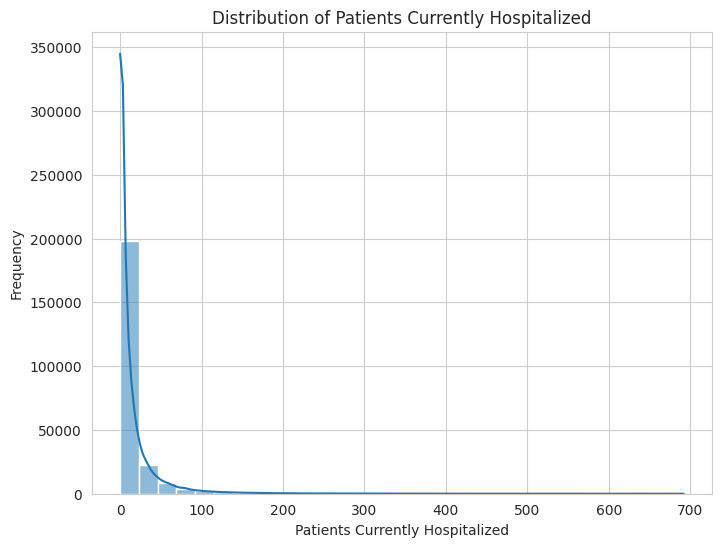

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Patients Currently Hospitalized'], kde=True, bins=30)
plt.title('Distribution of Patients Currently Hospitalized')
plt.xlabel('Patients Currently Hospitalized')
plt.ylabel('Frequency')
plt.show()

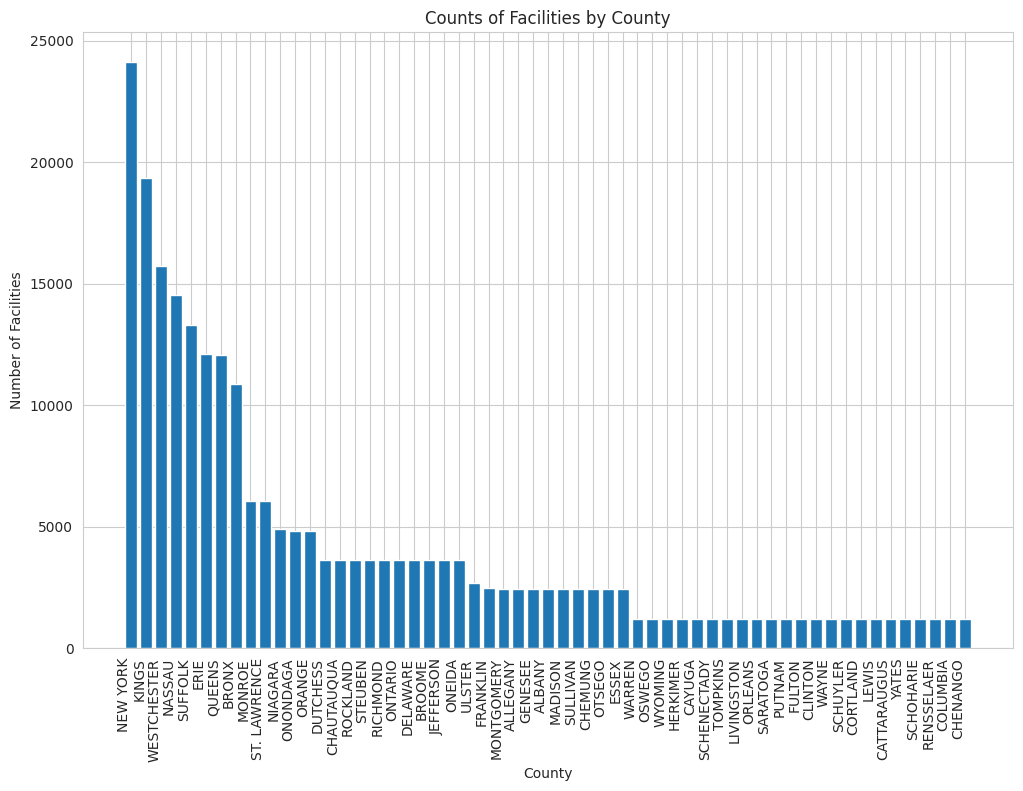

In [ ]:
plt.figure(figsize=(12, 8))
county_counts = df['Facility County'].value_counts()

# Bar plot using Matplotlib
plt.bar(county_counts.index, county_counts.values)

plt.title('Counts of Facilities by County')
plt.xticks(rotation=90, ha='right')
plt.xlabel('County')
plt.ylabel('Number of Facilities')

plt.show()


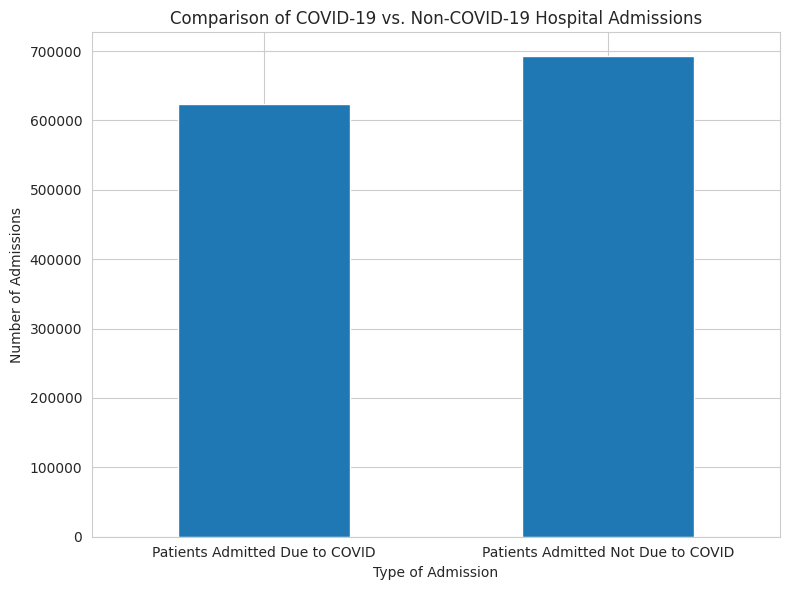

In [ ]:
plt.figure(figsize=(8, 6))
admissions_summary = df[['Patients Admitted Due to COVID', 'Patients Admitted Not Due to COVID']].sum()
admissions_summary.plot(kind='bar')
plt.title('Comparison of COVID-19 vs. Non-COVID-19 Hospital Admissions')
plt.xlabel('Type of Admission')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

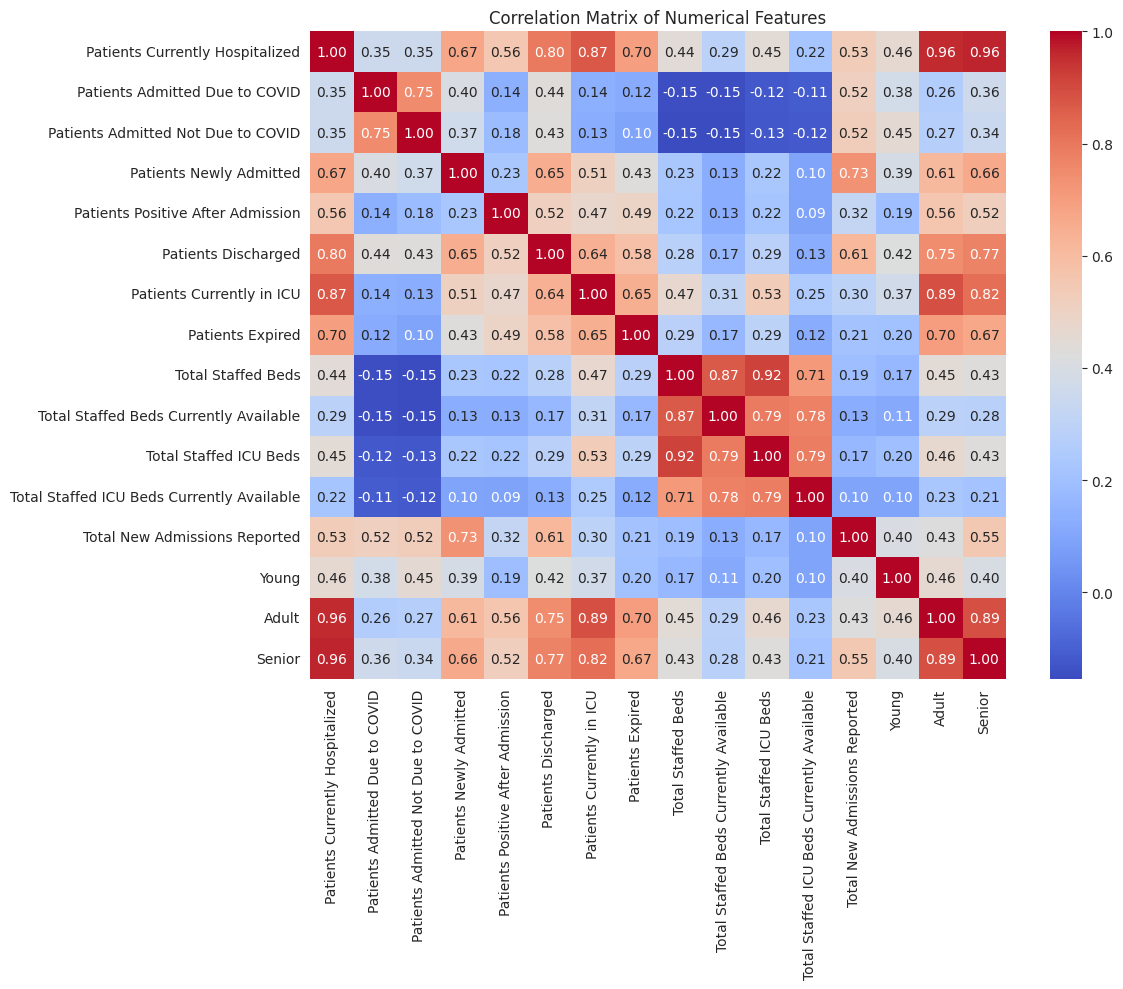

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

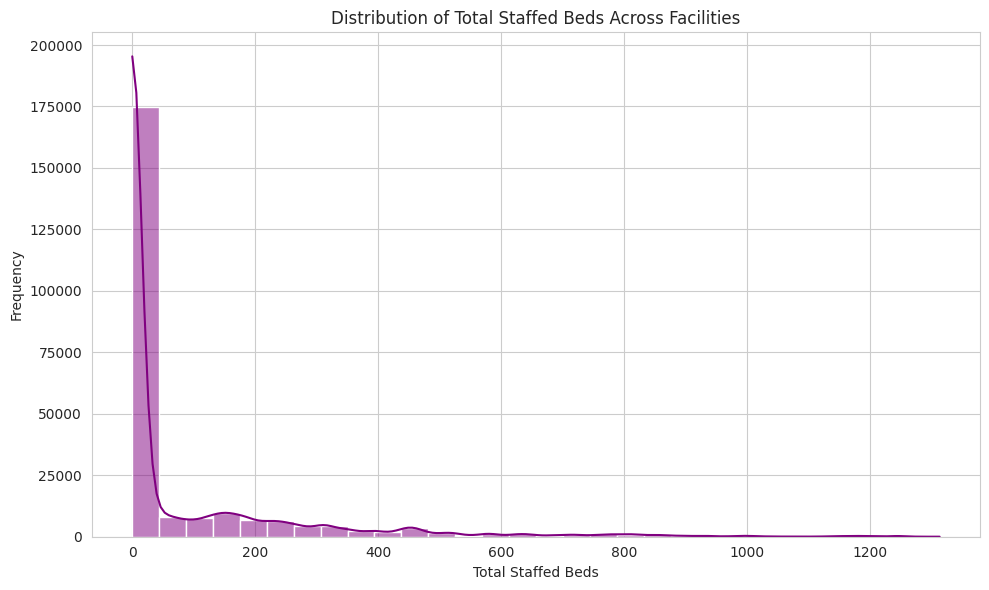

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Staffed Beds'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Staffed Beds Across Facilities')
plt.xlabel('Total Staffed Beds')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

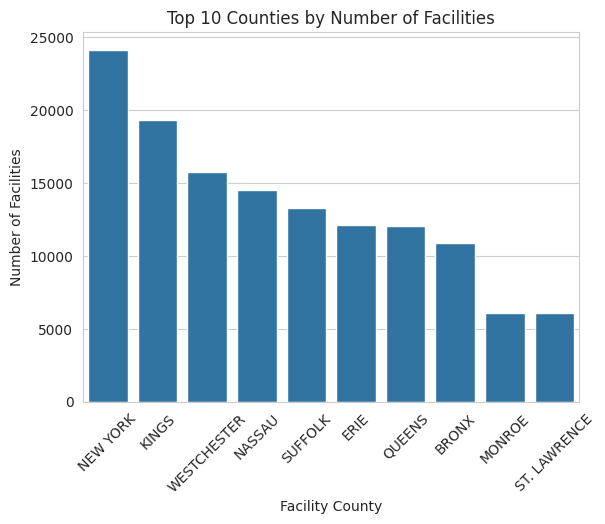

In [ ]:
county_counts = df['Facility County'].value_counts().head(10)
sns.barplot(x=county_counts.index, y=county_counts.values)
plt.title('Top 10 Counties by Number of Facilities')
plt.xlabel('Facility County')
plt.ylabel('Number of Facilities')
plt.tick_params(axis='x', rotation=45)

## Convert features with string datatype to categorical using Onehotencoding

In [ ]:
df_preprocessed=pd.get_dummies(df, columns = ['Facility Name','Facility County','Facility Network'])


## Normalization

In [ ]:
n_col= ['Patients Currently Hospitalized','Patients Admitted Due to COVID','Patients Admitted Not Due to COVID','Patients Newly Admitted','Patients Positive After Admission','Patients Discharged','Patients Currently in ICU','Patients Expired','Total Staffed Beds','Total Staffed Beds Currently Available','Total Staffed ICU Beds','Total Staffed ICU Beds Currently Available','Total New Admissions Reported','Young','Adult','Senior']
scaler = StandardScaler()
df_preprocessed[n_col] = scaler.fit_transform(df_preprocessed[n_col])

In [ ]:
structuretype_mapping = {
      'WESTERN REGIONAL OFFICE':0,
      'METROPOLITAN AREA REGIONAL OFFICE':1,
      'CENTRAL NEW YORK REGIONAL OFFICE':2,
      'CAPITAL DISTRICT REGIONAL OFFICE':3
}

df_preprocessed['DOH Region'] = df_preprocessed['DOH Region'].map(structuretype_mapping).fillna(0)

In [ ]:

df_preprocessed.to_csv("preprocessed_dataset.csv",index=False)

In [ ]:
# Define X and the target Y
X_data = df_preprocessed.drop("DOH Region",axis=1)
Y_target = df_preprocessed["DOH Region"]

# Split the dataset into 70% training and 30% testing
X_train, X_temp, y_train, y_temp = train_test_split(X_data, Y_target, test_size=0.3, random_state=42)

# Split the temporary set into testing and validation
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the splits
(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_validation.shape, y_validation.shape)

((167894, 312), (167894,), (35977, 312), (35977,), (35978, 312), (35978,))

## Decision Tree

Accuracy: 91.9309558884843
Loss:1.3974297142560173


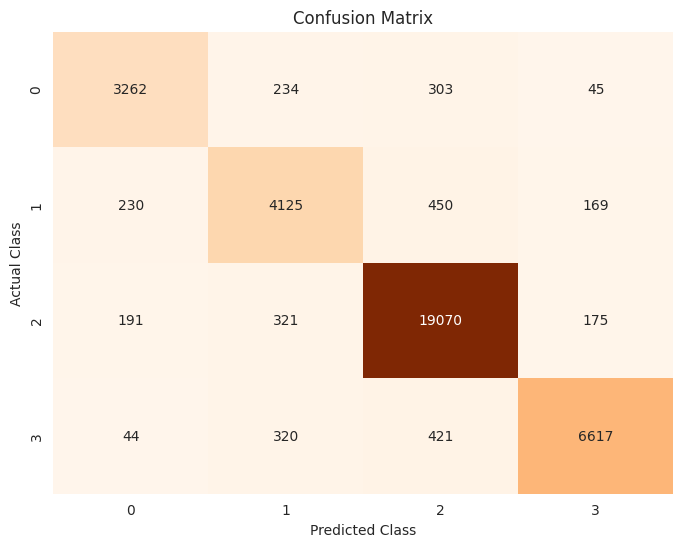

In [ ]:

clf = DecisionTreeClassifier(random_state=42)

X_data = pd.get_dummies(df, columns=[ "Facility Network"])
X_data = X_data.drop(["DOH Region", "Facility County",'Facility Name'], axis=1)
Y_target = df["DOH Region"]

X_train, X_temp, y_train, y_temp = train_test_split(X_data, Y_target, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
prob_dt = clf.predict_proba(X_test)

# Evaluate the model's performance on the test set
accuracy_dt = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, prob_dt)

print(f"Accuracy: {accuracy_dt*100}")
print(f"Loss:{loss}")

con_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


## Random Forest

Random Forest Accuracy: 69.32206687605971
Loss:1.3974297142560173


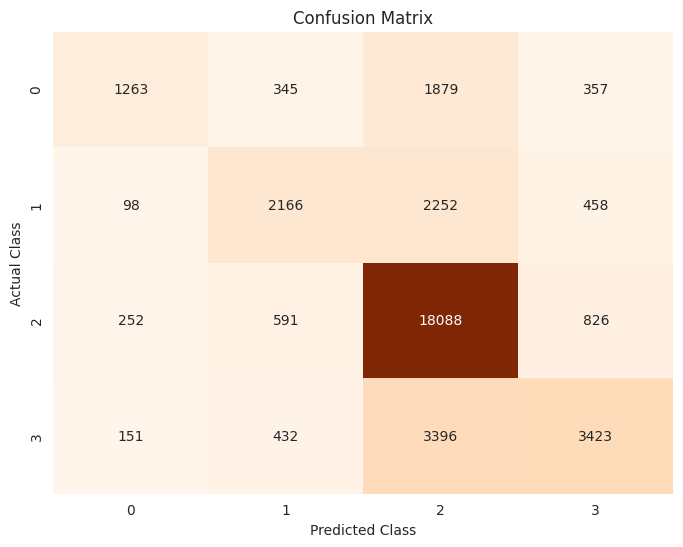

In [ ]:
clf = RandomForestClassifier(random_state=42)

X_data = df.drop(["DOH Region", "Facility County",'Facility Name',"Facility Network"], axis=1)
Y_target = df["DOH Region"]

X_train, X_temp, y_train, y_temp = train_test_split(X_data, Y_target, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)
prob_lr = clf.predict_proba(X_test)

y_pred = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, prob_dt)

print(f"Random Forest Accuracy: {accuracy_rf*100}")
print(f"Loss:{loss}")

con_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


## XGBClassifier

XGBoost Accuracy: 70.52005447925063
Loss:0.7487998081867185


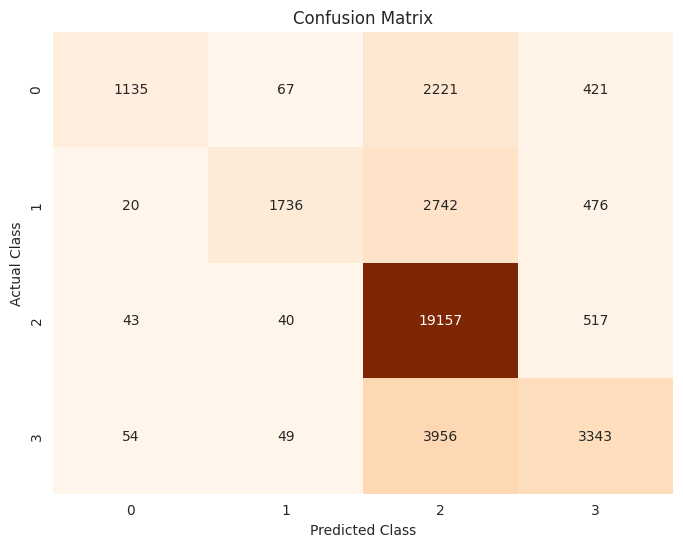

In [ ]:
clf = XGBClassifier(random_state=42)
X_data = df.drop(["DOH Region","Facility County","Facility Network", 'Facility Name'], axis=1)
Y_target = df["DOH Region"]

label_encoder = LabelEncoder()

# Fit and transform the target variable
Y_target_encoded = label_encoder.fit_transform(Y_target)

X_train, X_temp, y_train, y_temp = train_test_split(X_data, Y_target_encoded, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation_encoded = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the XGBoost model on the training set
clf.fit(X_train, y_train)
prob_lr = clf.predict_proba(X_test)

# Make predictions on the test set
y_pred_encoded = clf.predict(X_test)

# Decode the predicted labels back to original region names
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

accuracy_xg = accuracy_score(y_test, y_pred_encoded)
loss = log_loss(y_test, prob_lr)

print(f"XGBoost Accuracy: {accuracy_xg*100}")
print(f"Loss:{loss}")

# Plot the Confusion Matrix
con_matrix = confusion_matrix(y_test, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


## Comparision of Models

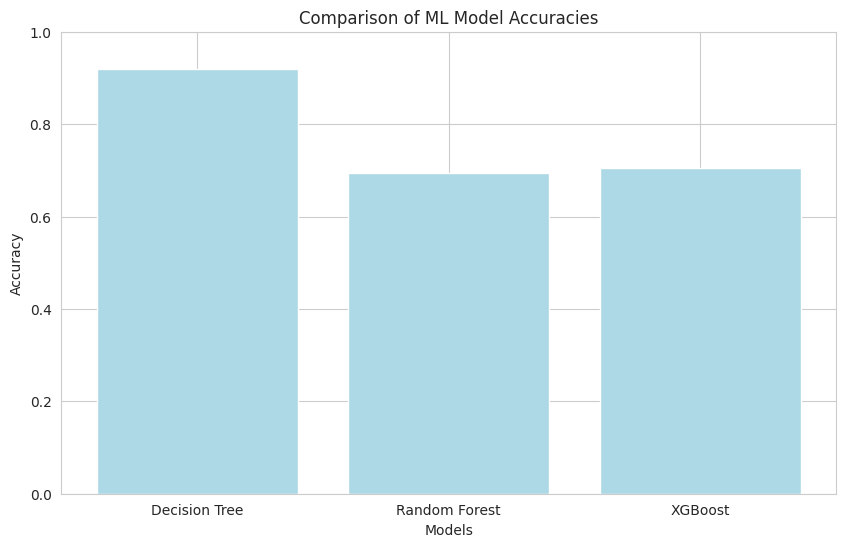

In [ ]:
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy_dt, accuracy_rf, accuracy_xg]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['lightblue', 'lightblue', 'lightblue'])
plt.title('Comparison of ML Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


## Step 3: Intro to PyTorch and Building a NN

# PyTorch tutorial

# Tensors

Importing Libraries

In [ ]:
import torch
import numpy as np

Initialization

In [ ]:
data = [6, 4], [4, 1]
x_data = torch.tensor(data)
print(x_data)
print(type(x_data))

tensor([[6, 4],
        [4, 1]])
<class 'torch.Tensor'>


Numpy to Tensor

In [ ]:
np_array = np.array(data)
print(np_array)
x_np = torch.from_numpy(np_array)
print(x_np)

[[6 4]
 [4 1]]
tensor([[6, 4],
        [4, 1]])


Tensor to Numpy

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Retaining and overriding proprties of the tensor

In [ ]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3904, 0.2162],
        [0.0420, 0.0812]]) 



Determining the dimensions of the tensors with respect to shape

In [ ]:
shape = (5, 4,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0646, 0.0835, 0.3420, 0.9133],
        [0.1769, 0.2619, 0.9408, 0.6048],
        [0.2926, 0.5838, 0.4962, 0.2927],
        [0.1128, 0.9863, 0.8564, 0.5100],
        [0.1912, 0.1184, 0.1305, 0.3873]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


# Tensor Attributes

In [ ]:
tensor = torch.rand(3, 5)

print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor([[0.1565, 0.0799, 0.7500, 0.1493, 0.2946],
        [0.3073, 0.5608, 0.3288, 0.5070, 0.4099],
        [0.7552, 0.8040, 0.0709, 0.3016, 0.9599]])
Shape of tensor: torch.Size([3, 5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Tensor Operations

Indexing and Slicing

In [ ]:
tensor = torch.ones(3, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


Multiplication element wise

In [ ]:
print(f"tensor * tensor \n {tensor * tensor}")

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Tensor matrix multiplication

In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


Sum_

In [ ]:
print(tensor, "\n")
tensor.add_(7)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[8., 7., 8., 8.],
        [8., 7., 8., 8.],
        [8., 7., 8., 8.]])


## Introduction to torch.autograd

In [ ]:
! pip install torchvision

## Differentiation in Autograd

In [ ]:
import torch

a = torch.tensor([5., 4.], requires_grad=True)
b = torch.tensor([8., 3.], requires_grad=True)
Q = 4*a**4 - b**3
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)
print(6*a**3 == a.grad)
print(-5*b**2 == b.grad)

tensor([False, False])
tensor([False, False])


 Exclusion from DAG

In [ ]:
x = torch.rand(5, 4)
y = torch.rand(5, 4)
z = torch.rand((5, 4), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


# Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 3)
        self.conv2 = nn.Conv2d(12, 32, 3)
        self.fc1 = nn.Linear(32 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 5)

    def forward(self, a):
        a = F.max_pool2d(F.relu(self.conv1(a)), (2, 2))
        a = F.max_pool2d(F.relu(self.conv2(a)), 2)
        a = torch.flatten(a, 1)
        a = F.relu(self.fc1(a))
        a = F.relu(self.fc2(a))
        a = self.fc3(a)
        return a


net = Net()
print(net)




Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([12, 3, 3, 3])


In [ ]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0611, -0.0777,  0.0364, -0.0236,  0.0190]],
       grad_fn=<AddmmBackward0>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 5))

## Loss function

In [ ]:
output = net(input)
target = torch.randn(5)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1938, grad_fn=<MseLossBackward0>)


In [ ]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

# BackProp

In [ ]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0006,  0.0035, -0.0100,  0.0001, -0.0197,  0.0060,  0.0299, -0.0163,
        -0.0104,  0.0091, -0.0020,  0.0142])


Update the weights

In [ ]:

learning_rate = 0.03
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)



In [ ]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)


optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a classifier

importing libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.004, momentum=0.8)

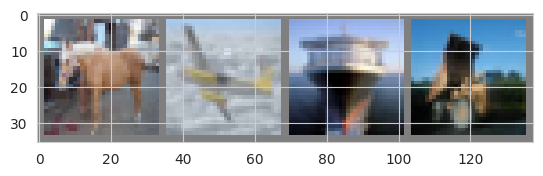

horse plane ship  truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Convolution neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Training Completed')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.295
[1,  6000] loss: 2.248
[1,  8000] loss: 2.205
[1, 10000] loss: 2.181
[1, 12000] loss: 2.155
[2,  2000] loss: 2.129
[2,  4000] loss: 2.099
[2,  6000] loss: 2.089
[2,  8000] loss: 2.077
[2, 10000] loss: 2.062
[2, 12000] loss: 2.062
Training Completed


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Test the data

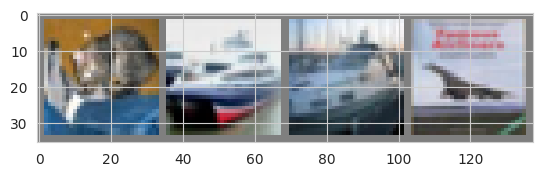

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  frog  car   ship  ship 


### Accuracy

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        a, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')

Accuracy: 40 %


In [ ]:

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 40.1 %
Accuracy for class: car   is 58.5 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 29.7 %
Accuracy for class: dog   is 37.6 %
Accuracy for class: frog  is 68.5 %
Accuracy for class: horse is 59.7 %
Accuracy for class: ship  is 53.6 %
Accuracy for class: truck is 56.4 %


# Hyperparameters Tuning

## 1

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net1 = Net1()
print(net1)


Net1(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data


        optimizer1.zero_grad()


        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.305
[1,  6000] loss: 2.304
[1,  8000] loss: 2.305
[1, 10000] loss: 2.304
[1, 12000] loss: 2.304
[2,  2000] loss: 2.305
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.303
[2, 12000] loss: 2.305
Finished Training


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net1(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 11 %


Number of Layers:
Convolutional Layers: 2 (conv1 and conv2)

Number of Nodes per Layer:
Input Layer: 3 channels for the image (RGB)
conv1: 8 channels
conv2: 16 channels
fc1: 256 nodes
fc2: 128 nodes
fc3: 10 nodes

Activation Function: ReLu

Optimizer:SGD   

Learning Rate:0.001

Accuracy:11%

## 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net2 = Net2()
print(net2)


Net2(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.01, momentum=0.8)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.303
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.304
[2, 10000] loss: 2.303
[2, 12000] loss: 2.304
Finished Training


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net2(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 7 %


Number of Layers: Convolutional Layers: 2 (conv1 and conv2)
Pooling Layers: 2 (pooling after conv1 and conv2)
Fully Connected (Linear) Layers: 3 (fc1, fc2, and fc3)

Number of Nodes per Layer:

Input Layer: 3 channels for the image (RGB)
conv1: 16 channels
conv2: 32 channels
fc1: 512 nodes
fc2: 256 nodes
fc3: 10 nodes (output layer for classification)

Activation Function: ReLu

Optimizer:SGD

Learning Rate:0.01

Accuracy:7%

## 3

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net3 = Net3()
print(net3)


Net3(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer3 = optim.Adam(net3.parameters(), lr=0.001)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer3.zero_grad()
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.302
[1, 12000] loss: 2.304
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.304
Finished Training


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net3(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct // total} %')

Accuracy: 9 %


Number of Layers:

Convolutional Layers: 2 (conv1 and conv2)
Pooling Layers: 2 (pooling after conv1 and conv2)
Fully Connected (Linear) Layers: 3 (fc1, fc2, and fc3)

Number of Nodes per Layer:

Input Layer: 3 channels for the image (RGB)
conv1: 32 channels
conv2: 64 channels
fc1: 512 nodes
fc2: 256 nodes
fc3: 10 nodes (output layer for classification)

Optimizer:Adam

Accuracy:9%

Activation function:Relu

Learning rate: 0.001

## Defining Neural Network for Part 1

In [ ]:
X_data = df_preprocessed.drop('DOH Region', axis=1).values
y_target = df_preprocessed['DOH Region'].values

X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_target, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train).long()
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val).long()
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test).long()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
print(X_data.shape)

(239849, 312)


In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(312, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)
        self.dropout = nn.Dropout(p=0.92)

    def forward(self, a):
        a = torch.flatten(a, 1)
        a = F.relu(self.fc1(a))
        a = self.dropout(a)
        a = F.relu(self.fc2(a))
        a = self.dropout(a)
        a = self.fc3(a)
        return a


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=312, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
  (dropout): Dropout(p=0.92, inplace=False)
)


## Defining the criterion and optimizer for our model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.004, momentum=0.8)

In [ ]:
def train_and_validate(net, train_loader, val_loader, optimizer, criterion, epochs=10):
    train_losses=[]
    val_losses=[]
    val_accuracies = []

    for epoch in range(10):
        net.train()
        running_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss = running_loss + loss.item()

        train_losses.append(running_loss / len(train_loader))

        net.eval()

        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total =  total + labels.size(0)
                correct =  correct + (predicted == labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(correct / total)
        print('Epoch:', epoch+1, " Train Loss:", train_losses[-1],' Validation Loss:', val_losses[-1])


    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

## Train and Validate

Epoch: 1  Train Loss: 1.0233072972707091  Validation Loss: 0.6031730903784434
Epoch: 2  Train Loss: 0.6401106117565897  Validation Loss: 0.5157793554464976
Epoch: 3  Train Loss: 0.5863663984779995  Validation Loss: 0.5018442233403524
Epoch: 4  Train Loss: 0.5747243181074727  Validation Loss: 0.49577387221654257
Epoch: 5  Train Loss: 0.563894020135739  Validation Loss: 0.4858132712046305
Epoch: 6  Train Loss: 0.5401138403627148  Validation Loss: 0.448677330493927
Epoch: 7  Train Loss: 0.4947694955855141  Validation Loss: 0.3443246522744497
Epoch: 8  Train Loss: 0.4424450979824263  Validation Loss: 0.300483494758606
Epoch: 9  Train Loss: 0.4269119736928867  Validation Loss: 0.29237763742605843
Epoch: 10  Train Loss: 0.42596236975362356  Validation Loss: 0.29407608981927236
Accuracy: 86 %


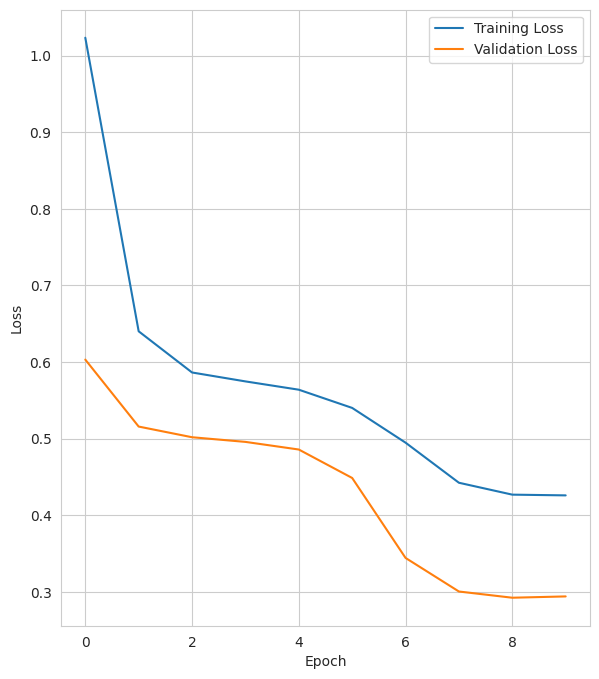

In [ ]:
train_and_validate(net, train_loader, val_loader, optimizer, criterion, epochs=10)

def test_accuracy(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy:', correct*100 // total,"%")

test_accuracy(net, test_loader)

In [ ]:
print(summary(net, (312,)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          40,064
           Dropout-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
           Dropout-4                   [-1, 64]               0
            Linear-5                    [-1, 4]             260
Total params: 48,580
Trainable params: 48,580
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.19
----------------------------------------------------------------
None


In [ ]:
model_weights = {}
for name, parameter in net.named_parameters():
    model_weights[name] = parameter.cpu().detach().numpy()

with h5py.File('model_weights.h5', 'w') as h5file:
    for name, weights in model_weights.items():
        h5file.create_dataset(name, data=weights)


## References:

## https://scikit-learn.org/stable/
## https://pandas.pydata.org/
## https://pytorch.org/tutorials/beginner/saving_loading_models.html

##Dataset link: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Hospitalizations/jw46-jpb7/about_data